In [1]:
import requests
import bs4 as bs
import pandas as pd
import numpy as np
import warnings
import re
import datetime
import time
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function, division, absolute_import #make compatible with Python 2 and Python 3

In [2]:
#Scraping code for InvestFeed
record = pd.DataFrame()
for i in range(0,241):
    post=[]
    date=[]
    url = "https://www.investfeed.com/currency/BTC?page="+str(i+1)
    soup = bs.BeautifulSoup(requests.get(url).text, "html.parser")
    content = soup.find_all('div', attrs={'class': 'post-content'})
    date_time = soup.find_all('div',attrs={'class':'floated-right'})
    for x in range(len(content)):
        post.append(re.sub(r'\s+', ' ', content[x].text))
        date.append(re.sub(r'\s+',' ',date_time[x].text))
    if (i+1)%25 == 0:
        print('{} pages completed!'.format(i+1))
    t1 = pd.Series(date)
    t2 = pd.Series(post)
    temp_record = pd.concat([t1,t2],axis=1)
    record = pd.concat([record,temp_record]).reset_index(drop=True)

25 pages completed!
50 pages completed!
75 pages completed!
100 pages completed!
125 pages completed!
150 pages completed!
175 pages completed!
200 pages completed!
225 pages completed!


In [3]:
record.shape

(2410, 2)

In [4]:
record.head(25)

,0,1
0,"December 3, 2017, 11:37 pm",Bitcoin hit 11874 for new ATH! http://ifeed.i...
1,"December 3, 2017, 11:36 pm",Binance now trading $PPT and $ADA . Binance i...
2,"December 3, 2017, 11:32 pm",Bitcoin rollercoaster continues http://ifeed....
3,"December 3, 2017, 11:32 pm",McAfee ups the Ante! http://ifeed.io/p5hg2 #b...
4,"December 3, 2017, 10:38 pm",#BTC that's my Boy! http://ifeed.io/EXPnp $11...
5,"December 3, 2017, 8:26 pm","Bitcoin is often compared to gold, but gold’s..."
6,"December 3, 2017, 7:07 pm",Hello everybody check out my new video on why...
7,"December 3, 2017, 5:54 pm",Important date to look out for. Bitcoin futur...
8,"December 3, 2017, 5:33 pm",Is Bitcoin a bubble? If mainstream news sourc...
9,"December 3, 2017, 5:21 pm",Posted super late yesterday so going to re-po...


In [5]:
#record = record.drop(record[record.index > 2264].index) #Elements beyond this had random content. 2264 captures all posts.

In [6]:
record = record.rename(columns = {0:'Date',1:'Post'})

In [7]:
record['Date'] = pd.to_datetime(record['Date']).dt.date #Converting from str to datetime obj and retaining just the dates

In [8]:
record = record.iloc[23:].reset_index(drop=True) #Prices unavailable for Novmeber 30th

In [9]:
col_names = ['Date','Price']
btc = pd.read_csv('btc_price.csv',header=None,names=col_names)

In [10]:
print(btc.shape)
btc.head()

(365, 2)


,Date,Price
0,2016-11-30 00:00:00,742.696762
1,2016-12-01 00:00:00,752.246125
2,2016-12-02 00:00:00,772.437250
3,2016-12-03 00:00:00,764.339625
4,2016-12-04 00:00:00,764.816250


In [11]:
#Setting labels for the Bitcoin prices to perform Sentiment Analysis
label=[]
for i in range(1,btc.shape[0]):
    if (btc.iat[i,1]>btc.iat[i-1,1]):
        btc.loc[btc.index[i],'Sentiment']=1
    else:
        btc.loc[btc.index[i],'Sentiment']=0
btc.loc[btc.index[0],'Sentiment']=0 #To match indices with btc. This false value will anyway go away when we trim BTC to match record df.
btc['Sentiment'] = btc['Sentiment'].astype(int)

In [12]:
btc['Date'] = pd.to_datetime(btc['Date']).dt.date

In [13]:
btc.head()

,Date,Price,Sentiment
0,2016-11-30,742.696762,0
1,2016-12-01,752.246125,1
2,2016-12-02,772.437250,1
3,2016-12-03,764.339625,0
4,2016-12-04,764.816250,1


In [14]:
temp = record.merge(btc, on='Date', how='inner')

In [15]:
sent = temp.drop('Price',1)

In [16]:
sent.head()

,Date,Post,Sentiment
0,2017-11-29,#bear or #Bulls ??? #bitcoinATM #miners #btc ...,0
1,2017-11-29,#bitcoinprice $9K not $12K #bitcoinATM #miner...,0
2,2017-11-29,#bitcoinprice $9K not $12K #bitcoinATM #miner...,0
3,2017-11-29,#bitcoinprice $9K not $12K #bitcoinATM #miner...,0
4,2017-11-29,"If $BTC is outlawed, then call me an outlaw. ...",0


In [17]:
sent.shape

(2319, 3)

1    1360
0     959
Name: Sentiment, dtype: int64


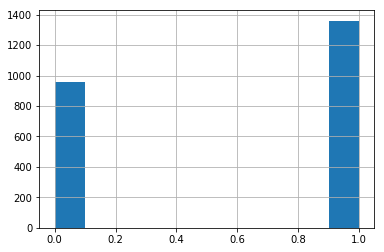

In [18]:
print(sent.Sentiment.value_counts())
sent.Sentiment.hist(); 

In [302]:
#Apply length function to the review column
lengths = sent.Post.apply(len)

print('Average character length of the posts are:')
print (np.mean(lengths))

Average character length of the posts are:
240.93616127677447


# NLP

In [19]:
import nltk
#nltk.download()

In [20]:
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

eng = stopwords.words('English')

In [21]:
test_post = sent['Post'][0]# the review used for initial analysis
print(test_post)

 #bear or #Bulls ??? #bitcoinATM #miners #btc #eth #ltc #BTG #Ethereum #cryptocurrency #btc #bitcointrade #mining #blockchain #Crypto #ltc #BitcoinGold #BitcoinCash #nanobank #ToTheMoon #trade #cryptoexchange #hold #HODL #altcoin #dash #bitcoinprice #bitofhumor #segwit2x 


In [22]:
print(len(sent_tokenize(test_post)))
sent_tokenize(test_post) # doesn't really split all sentences

2


[' #bear or #Bulls ???',
 '#bitcoinATM #miners #btc #eth #ltc #BTG #Ethereum #cryptocurrency #btc #bitcointrade #mining #blockchain #Crypto #ltc #BitcoinGold #BitcoinCash #nanobank #ToTheMoon #trade #cryptoexchange #hold #HODL #altcoin #dash #bitcoinprice #bitofhumor #segwit2x']

In [23]:
# Check if it does a better job if we add space after every period
test_post = test_post.replace('.','. ')

print(len(sent_tokenize(test_post)), end='\n\n') # number of sentences

# print all sentences on a new line
for sent in sent_tokenize(test_post):
    print(sent, end='\n\n')

2

 #bear or #Bulls ???

#bitcoinATM #miners #btc #eth #ltc #BTG #Ethereum #cryptocurrency #btc #bitcointrade #mining #blockchain #Crypto #ltc #BitcoinGold #BitcoinCash #nanobank #ToTheMoon #trade #cryptoexchange #hold #HODL #altcoin #dash #bitcoinprice #bitofhumor #segwit2x



In [24]:
test_post = re.sub('[^a-zA-Z]',' ',test_post)
print(test_post) # remove special character

  bear or  Bulls      bitcoinATM  miners  btc  eth  ltc  BTG  Ethereum  cryptocurrency  btc  bitcointrade  mining  blockchain  Crypto  ltc  BitcoinGold  BitcoinCash  nanobank  ToTheMoon  trade  cryptoexchange  hold  HODL  altcoin  dash  bitcoinprice  bitofhumor  segwit x 


In [25]:
test_post = test_post.lower()

In [26]:
test_post

'  bear or  bulls      bitcoinatm  miners  btc  eth  ltc  btg  ethereum  cryptocurrency  btc  bitcointrade  mining  blockchain  crypto  ltc  bitcoingold  bitcoincash  nanobank  tothemoon  trade  cryptoexchange  hold  hodl  altcoin  dash  bitcoinprice  bitofhumor  segwit x '

In [27]:
test_post_words = test_post.split()
print(test_post_words[:10]) # tokenize and lower case
print(len(test_post_words))

['bear', 'or', 'bulls', 'bitcoinatm', 'miners', 'btc', 'eth', 'ltc', 'btg', 'ethereum']
31


In [28]:
ps = PorterStemmer() #initialize Porter Stemmer object

ps_stems = []
for w in test_post_words:
    ps_stems.append(ps.stem(w))

print(' '.join(ps_stems)) # add all the stemmed words to one string

bear or bull bitcoinatm miner btc eth ltc btg ethereum cryptocurr btc bitcointrad mine blockchain crypto ltc bitcoingold bitcoincash nanobank tothemoon trade cryptoexchang hold hodl altcoin dash bitcoinpric bitofhumor segwit x


In [29]:
#parts of speech tagging

token_tag = pos_tag(test_post_words)
token_tag[:10]

[('bear', 'NN'),
 ('or', 'CC'),
 ('bulls', 'NNS'),
 ('bitcoinatm', 'JJ'),
 ('miners', 'NNS'),
 ('btc', 'VBP'),
 ('eth', 'JJ'),
 ('ltc', 'NN'),
 ('btg', 'NN'),
 ('ethereum', 'NN')]

In [30]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [31]:
#from nltk.stem import WordNetLemmatizer


wnl = WordNetLemmatizer()

wnl_stems = []
for pair in token_tag:
    res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
    wnl_stems.append(res)

print(' '.join(wnl_stems))

bear or bull bitcoinatm miner btc eth ltc btg ethereum cryptocurrency btc bitcointrade mining blockchain crypto ltc bitcoingold bitcoincash nanobank tothemoon trade cryptoexchange hold hodl altcoin dash bitcoinprice bitofhumor segwit x


In [32]:
def post_cleaner(post):
    
    #1. Use regex to find emoticons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', post)
    
    #2. Remove punctuation
    post = re.sub("[^a-zA-Z]", " ",post)
    
    #3. Tokenize into words (all lower case)
    post = post.lower().split()
    
    #4. Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    post = [w for w in post if not w in eng_stopwords]
    
    #5. Join the review to one sentence
    post = ' '.join(post+emoticons)
    # add emoticons to the end

    return(post)

In [33]:
%%time

num_posts = len(sent['Post'])

post_clean_original = []

for i in range(0,num_posts):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d posts" %(i+1)) 
    post_clean_original.append(post_cleaner(record['Post'][i]))

TypeError: string indices must be integers

In [34]:
%%time
# Lemmatizer

post_clean_wnl = []

wnl = WordNetLemmatizer()

for i in range(0,num_posts):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d posts" %(i+1)) 
    
    wnl_stems = []
    token_tag = pos_tag(post_clean_original[i].split())
    for pair in token_tag:
        res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
        wnl_stems.append(res)

    post_clean_wnl.append(' '.join(wnl_stems))

NameError: name 'num_posts' is not defined

In [333]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

# put everything together in a function

def predict_sentiment(cleaned_posts, y=sent["Sentiment"]):

    print("Creating the bag of words model..\n")
    # CountVectorizer" is scikit-learn's bag of words tool, here we show more keywords 
    vectorizer = CountVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 max_features = 2000) 
    
    X_train, X_test, y_train, y_test = train_test_split(\
    cleaned_posts, y, random_state=0, test_size=0.2)

    # Then we use fit_transform() to fit the model / learn the vocabulary,
    # then transform the data into feature vectors.
    # The input should be a list of strings. .toarraty() converts to a numpy array
    
    train_bag = vectorizer.fit_transform(X_train).toarray()
    test_bag = vectorizer.transform(X_test).toarray()

    # You can extract the vocabulary created by CountVectorizer
    # by running print(vectorizer.get_feature_names())


    print("Training the random forest classifier..\n")
    # Initialize a Random Forest classifier with 75 trees
    forest = RandomForestClassifier(n_estimators = 50) 

    # Fit the forest to the training set, using the bag of words as 
    # features and the sentiment labels as the target variable
    forest = forest.fit(train_bag, y_train)


    train_predictions = forest.predict(train_bag)
    test_predictions = forest.predict(test_bag)
    
    train_acc = metrics.accuracy_score(y_train, train_predictions)
    valid_acc = metrics.accuracy_score(y_test, test_predictions)
    print("The training accuracy is: ", train_acc, "\n", "The validation accuracy is: ", valid_acc)
    print()
    print()
    #Extract feature importnace
    print('TOP TEN IMPORTANT FEATURES:')
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_10 = indices[:10]
    print([vectorizer.get_feature_names()[ind] for ind in top_10])

In [335]:
predict_sentiment(post_clean_original) #Accuracy measure with original sentences

Creating the bag of words model..

Training the random forest classifier..

The training accuracy is:  0.983718487395 
 The validation accuracy is:  0.607966457023


TOP TEN IMPORTANT FEATURES:
['bitcoin', 'btc', 'cryptocurrency', 'investfeed', 'support', 'eth', 'crypto', 'ift', 'http', 'cryptocurrencies']


In [336]:
predict_sentiment(post_clean_wnl) #Lemmatized sentences lead to lower accuracy

Creating the bag of words model..

Training the random forest classifier..

The training accuracy is:  0.984243697479 
 The validation accuracy is:  0.574423480084


TOP TEN IMPORTANT FEATURES:
['bitcoin', 'cryptocurrency', 'btc', 'investfeed', 'support', 'eth', 'cryptocurrencies', 'crypto', 'http', 'ift']


In [ ]:
lists=record['Post'].tolist()